# Bank dataset

We have a transaction details of 515 branches which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans # for KMeans clustering
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv("bank.csv")

# Checking the data

In [3]:
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [4]:
data_df.shape

(515, 6)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


# Checking Summary Statistic

In [6]:
data_df.iloc[:,1:].describe().round(0)

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.0,515.0,515.0,515.0,515.0
mean,232.0,151.0,82.0,2935.0,599.0
std,67.0,57.0,29.0,437.0,83.0
min,120.0,10.0,33.0,1200.0,380.0
25%,170.0,103.0,58.0,2675.0,538.0
50%,237.0,152.0,80.0,2960.0,601.0
75%,291.0,200.0,105.0,3300.0,658.0
max,350.0,247.0,212.0,3650.0,838.0


# Checking for Duplicates

In [7]:
data_df.duplicated().sum()

0

There are no Duplicates in the dataset

# Scaling the data

In [8]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [13]:
# Creating an object for the StandardScaler function
scaler = StandardScaler()

In [14]:
scaled_data = scaler.fit_transform(data_df.iloc[:,1:6]) # output is an array without the column names
scaled_df = pd.DataFrame(scaled_data,
                         columns=data_df.columns[1:])

In [15]:
scaled_df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039
...,...,...,...,...,...
510,1.573163,-0.188120,1.026024,-0.674860,1.143745
511,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458
512,1.513088,-1.138113,0.921016,-0.193913,0.927935
513,-0.604535,0.445209,-1.669192,-0.400033,-1.122257


In [16]:
# mean should be zero and std should be 1 for all features post scaling

scaled_df.describe().round(2)

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.00,515.00,515.00,515.00,515.00
mean,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.69,-2.48,-1.70,-3.97,-2.62
25%,-0.94,-0.84,-0.83,-0.59,-0.73
50%,0.07,0.02,-0.06,0.06,0.03
75%,0.88,0.87,0.82,0.84,0.71
max,1.77,1.69,4.56,1.64,2.87


# Creating Clusters using KMeans

## Forming 2 Clusters with K=2

In [17]:
# Create K Means cluster object and store it as k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [18]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

### Cluster Output for all the observations

In [19]:
# Get the labels or cluster membership of each observation
k_means.labels_[:10]

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

### Within Cluster Sum of Squares(WSS)

In [20]:
k_means.inertia_ # WSS

1943.3740862056484

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [21]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

2574.9999999999964

In [22]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1593.9708577192202

In [23]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1375.4932875022535

In [24]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1220.2742967592983

In [25]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1115.743872395149

WSS reduces as K keeps increasing

### Calculating WSS for other values of K - Elbow Method

In [26]:
wss =[] 

In [27]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [28]:
wss

[2574.9999999999964,
 1943.3740862056484,
 1593.9708577192202,
 1375.4932875022535,
 1220.2742967592983,
 1115.743872395149,
 1024.2940640357656,
 945.0390781132705,
 886.3657321414203,
 832.7774003606155]

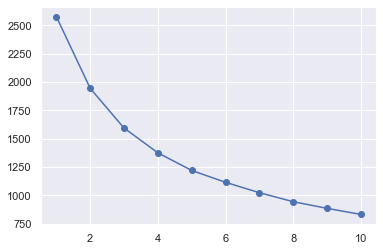

In [29]:
plt.plot(range(1,11), wss, marker = 'o');

# KMeans with K=3

In [30]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

## Cluster evaluation for 3 clusters: the silhouette score

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [32]:
# silhouette_score --> overall clusters quality, closer to 1 the better
silhouette_score(scaled_df,labels)

0.218819843712231

In [33]:
# silouette_sample --> for 'a' particular observation, how close it is to its cluster centroid
silhouette_samples(scaled_df,labels)[:10] # for 1st 10 observations in data

array([0.18585072, 0.27388886, 0.05963609, 0.20013532, 0.13098507,
       0.01439404, 0.27967759, 0.1166913 , 0.18469591, 0.18723267])

# KMeans with K=4

In [34]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

## Cluster evaluation for 4 clusters

In [35]:
silhouette_score(scaled_df,labels)

0.22755082117068726

# Check for multiple K-values in loop

In [36]:
ss = []
for k in range(2,11):
    sil_km = KMeans(n_clusters=k, random_state=1)
    sil_km.fit(scaled_df)
    labels = sil_km.labels_
    ss.append(silhouette_score(scaled_df,labels))

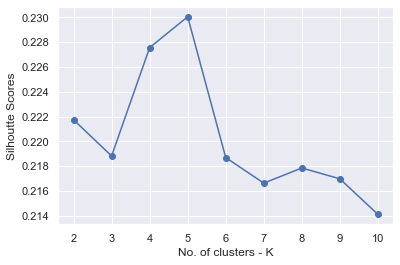

In [37]:
plt.plot(range(2,11),ss,marker ='o')
plt.xlabel('No. of clusters - K')
plt.ylabel('Silhoutte Scores');

silhouette score is better for 5 clusters than for other cluster numbers. So, final number of clusters we will take as 5.

In [38]:
k_means = KMeans(n_clusters=5, random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [39]:
# Appending Clusters labels to the original dataset
data_df["Clus_kmeans5"] = labels
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Clus_kmeans5
0,1,227,147,111,2460,639,4
1,2,123,86,65,3510,436,3
2,3,306,149,76,2570,669,1
3,4,251,112,129,3650,623,4
4,5,174,135,128,3400,579,4


# Cluster Profiling

In [40]:
data_df.Clus_kmeans5.value_counts().sort_index()

0    132
1    104
2    106
3     88
4     85
Name: Clus_kmeans5, dtype: int64

In [41]:
clust_profile=data_df.drop(['Bank'],axis=1) # dropping bank sl.no as we dont want to use it in caculations
clust_profile=clust_profile.groupby('Clus_kmeans5').mean()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
Clus_kmeans5,,,,,
0,295.378788,106.636364,72.325758,3116.060606,606.606061
1,285.326923,197.894231,84.490385,2517.211538,700.663462
2,181.745283,189.896226,57.103774,2983.490566,563.311321
3,169.136364,89.625000,90.579545,3005.056818,484.147727
4,197.611765,175.694118,114.247059,3030.000000,623.811765


In [42]:
clust_profile.round(0)

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
Clus_kmeans5,,,,,
0,295.0,107.0,72.0,3116.0,607.0
1,285.0,198.0,84.0,2517.0,701.0
2,182.0,190.0,57.0,2983.0,563.0
3,169.0,90.0,91.0,3005.0,484.0
4,198.0,176.0,114.0,3030.0,624.0


In [43]:
clust_profile['freq']=data_df.Clus_kmeans5.value_counts().sort_index()
clust_profile.round(0)

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
Clus_kmeans5,,,,,,
0,295.0,107.0,72.0,3116.0,607.0,132
1,285.0,198.0,84.0,2517.0,701.0,104
2,182.0,190.0,57.0,2983.0,563.0,106
3,169.0,90.0,91.0,3005.0,484.0,88
4,198.0,176.0,114.0,3030.0,624.0,85


# Observations & Recommendations

- Cluster 0: large size branch with low withdrawals,medium walkins, highest DD issuance, and medium Deposits volumes --> <p style = "font-weight:bold; color:tan;">**move to a smaller premises to save operational cost, rent etc or improve customer base in nearby localities through door to door initiatives and camps in large residential complexes**</p>

- Cluster 1: small size branch with very high walkins and with high withdrawals & high DD issuance volumes --> <p style = "font-weight:bold; color:tan;">**promote netbanking, reduce congestion and long queue at counters**</p>

- Cluster 2: large size branch with less deposit but high withdrawals --><p style = "font-weight:bold; color:tan;"> **maybe salaried customers, promote debit/credit cards for payments so that they dont need to come to withdraw cash**</p>

- Cluster 3: Large size branch but with lowest number of walkins with lowest withdrawals transactions and DD issuances --> <p style = "font-weight:bold; color:tan;">**move to a smaller premises to save operational cost, rent etc or improve customer base in nearby localities through door to door initiatives and camps in large residential complexes**</p>

- Cluster 4: Large branch, medium walkins with high deposits and withdrawal volumes --><p style = "font-weight:bold; color:tan;"> **promote higher variants of accounts with higher transaction limits, promote use of cards for payments instead of cash withdrawals, install more ATMs at branch for withdrawals, install cash acceptance machines to reduce load and waiting time at counters**</p>

<p style = "font-size: 40px; color:gold; font-weight:bold">Great Learning !!</p>